# Connectivity Analysis


In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import analysis as an

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from pathlib import Path

data_folder = Path.cwd() / '..' / 'data'
data_folder = data_folder.resolve()
# measurement_folder = data_folder / '2017-12-11-122231'
measurement_folder = data_folder / '2017-12-11-155541'

for data_file in measurement_folder.rglob('*.json'):
    print(data_file)

/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-11-155541/nuc4-nuc6.json
/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-11-155541/nuc13-nuc12.json
/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-11-155541/nuc11-nuc6.json
/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-11-155541/nuc10-nuc12.json
/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-11-155541/nuc11-nuc12.json
/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-11-155541/nuc4-nuc11.json
/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-11-155541/nuc11-nuc4.json
/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-11-155541/nuc6-nuc4.json
/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-11-155541/nuc10-nuc4.json
/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-11-155541/nuc12-nuc11.json
/home/chwalisz/Code/twist/experiments/wifi-channel/data/2017-12-11-155541/nuc13-nuc4.json
/home/ch

In [24]:
dfl = []
for fname in measurement_folder.rglob('*.json'):
#     print(fname)
    try:
        df1 = an.get_iperf_data(fname)
        dfl.append(df1)
    except ValueError:
        continue
df = pd.concat(dfl)
df.head()

,bits_per_second,bytes,start,packets,server_bits_per_second,server_bytes,server_start,server_packets,server_jitter_ms,server_lost_packets,cookie,timestamp,server,client,connection,mode
0,31780600.0,3973120,0.00000,485,29880800,3735552,0.00000,456,2.21400,0,nuc6.1513004370.482048.1e7d1f461ef66,"Mon, 11 Dec 2017 14:59:30 GMT",nuc10,nuc6,nuc10 nuc6,Access Point
1,36438000.0,4554752,1.00014,556,36242800,4530176,1.00012,553,2.56787,0,nuc6.1513004370.482048.1e7d1f461ef66,"Mon, 11 Dec 2017 14:59:30 GMT",nuc10,nuc6,nuc10 nuc6,Access Point
2,32178100.0,4022272,2.00014,491,32307900,4038656,2.00008,493,2.44432,0,nuc6.1513004370.482048.1e7d1f461ef66,"Mon, 11 Dec 2017 14:59:30 GMT",nuc10,nuc6,nuc10 nuc6,Access Point
3,34668400.0,4333568,3.00014,529,34735100,4341760,3.00013,530,2.60632,0,nuc6.1513004370.482048.1e7d1f461ef66,"Mon, 11 Dec 2017 14:59:30 GMT",nuc10,nuc6,nuc10 nuc6,Access Point
4,32047200.0,4005888,4.00014,489,31916100,3989504,4.00010,487,2.55939,0,nuc6.1513004370.482048.1e7d1f461ef66,"Mon, 11 Dec 2017 14:59:30 GMT",nuc10,nuc6,nuc10 nuc6,Access Point


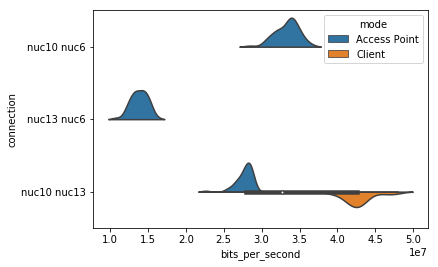

In [25]:
sns.violinplot(x='bits_per_second', y='connection', hue='mode', data=df, split=True)

In [ ]:
df.cookie.unique()